In [11]:
!pip install spacy
!python -m spacy download pt_core_news_sm

# Célula 2: Seu código Python
import pandas as pd
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



--- Tabela de Qualidade do Dia ---
| dia_semana    |   qualidade_dia |
|:--------------|----------------:|
| Domingo       |            7    |
| Segunda-feira |            1    |
| Terça-feira   |            5.17 |
| Quarta-feira  |            3.67 |
| Quinta-feira  |            6.83 |
| Sexta-feira   |            6.33 |
| Sábado        |            7.5  |


/tmp/ipython-input-293974853.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_semana', y='qualidade_dia', data=pontuacao_diaria, palette='viridis')



Gráfico 'qualidade_dia_idoso.png' gerado com sucesso.

Dados salvos em 'monitoramento_idoso_dados.csv' (simulando o banco de dados).


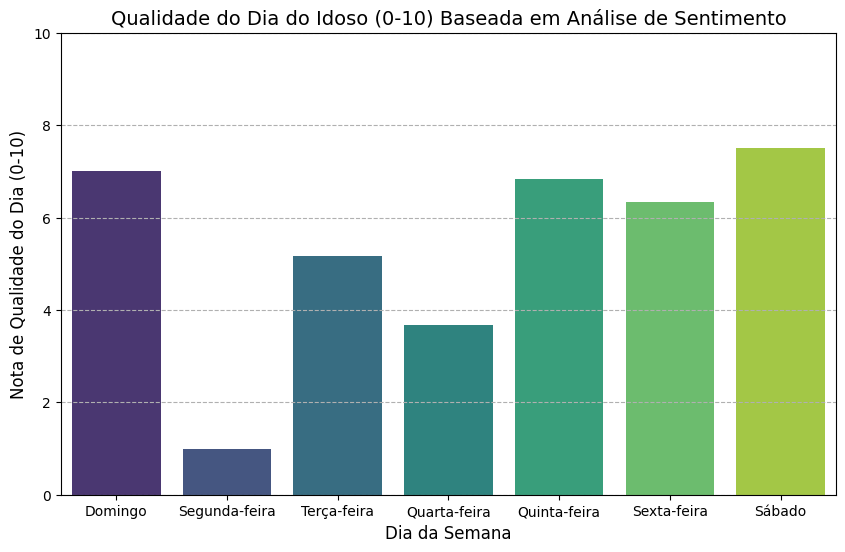

In [12]:
import pandas as pd
import spacy
import random
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Simulação de Dados ---

# Lista de frases com sentimentos variados para simular o dia a dia
frases_positivas = [
    "O sol está tão bonito hoje, me sinto revigorado.",
    "Tomei meu café da manhã preferido, estava delicioso!",
    "Recebi uma visita que me deixou muito feliz.",
    "Consegui caminhar um pouco mais hoje, que bom.",
    "A novela da tarde está ótima, dei boas risadas.",
    "O almoço de hoje estava uma delícia, a cozinheira se superou.",
    "Lembrei de uma história engraçada da minha juventude.",
    "Meus netos me ligaram, que alegria!",
    "Estou me sentindo muito bem e sem dores.",
    "Terminei de ler um livro muito interessante.",
    "A música que estava tocando no rádio me acalmou.",
    "Hoje o dia foi produtivo e tranquilo.",
    "Agradeço por mais um dia de paz.",
    "Estou ansioso para o jantar.",
    "A enfermeira foi muito atenciosa comigo hoje.",
    "Adoro o cheiro de chuva que está vindo.",
    "Consegui resolver aquele pequeno problema que me incomodava.",
    "Sinto que estou melhorando a cada dia.",
    "É bom ter a família por perto.",
    "Que dia maravilhoso, cheio de boas notícias."
]

frases_neutras = [
    "Acordei na hora de sempre.",
    "Tomei meus remédios conforme a prescrição.",
    "O tempo está nublado, nem frio nem calor.",
    "Assisti ao jornal da manhã.",
    "Comi um pão com manteiga no lanche.",
    "Passei a tarde descansando na poltrona.",
    "Acho que vou dormir cedo hoje.",
    "A televisão está ligada, mas não estou prestando muita atenção.",
    "Preciso pedir para arrumar a lâmpada do corredor.",
    "O dia passou rápido.",
    "A rotina é sempre a mesma.",
    "Não aconteceu nada de especial hoje.",
    "Fiz as tarefas que precisava fazer.",
    "A água do banho estava na temperatura certa.",
    "O carteiro entregou a correspondência."
]

frases_negativas = [
    "Estou com uma dorzinha chata nas costas.",
    "Sinto falta de mais movimento, estou entediado.",
    "Acho que esqueci de tomar um dos meus remédios.",
    "O barulho da rua está me incomodando muito.",
    "Não dormi muito bem esta noite.",
    "A comida estava um pouco sem sal hoje.",
    "Me sinto um pouco sozinho.",
    "Estou preocupado com as contas que precisam ser pagas.",
    "Acho que vou ficar doente.",
    "Não gosto quando chove assim.",
    "A televisão não está funcionando direito.",
    "Sinto um peso no peito.",
    "O dia está muito longo e cansativo.",
    "Queria que as coisas fossem diferentes.",
    "Estou um pouco irritado com o atraso da visita."
]

dias_da_semana = ["Domingo", "Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado"]

def gerar_frases_diarias(dia_semana, num_frases=30):
    """Gera 30 frases para um dia, com uma variação de sentimentos simulada."""

    # Simular uma distribuição de sentimentos para cada dia
    if dia_semana in ["Domingo", "Sábado"]:
        # Sábado: Dia excelente (ex: time ganhou, nota 8). Mais positivas.
        if dia_semana == "Sábado":
            pesos = [0.8, 0.1, 0.1]  # Extremamente positivas
        # Domingo: Dia bom. Mais positivas.
        elif dia_semana == "Domingo":
            pesos = [0.6, 0.3, 0.1]  # Muito positivas
    # Segunda-feira: Dia péssimo (ex: perdeu parente, levou tombo, nota 1). Extremamente negativas.
    elif dia_semana == "Segunda-feira":
        pesos = [0.05, 0.05, 0.9] # Extremamente negativas
    # Quarta-feira: Dia ruim. Mais negativas.
    elif dia_semana == "Quarta-feira":
        pesos = [0.2, 0.3, 0.5]  # Mais negativas
    # Outros dias (Terça, Quinta, Sexta): Equilibradas/Neutras
    else:
        pesos = [0.4, 0.4, 0.2]  # Equilibradas/Neutras

    frases_selecionadas = []

    for _ in range(num_frases):
        tipo_frase = random.choices(["positiva", "neutra", "negativa"], weights=pesos, k=1)[0]

        if tipo_frase == "positiva":
            frase = random.choice(frases_positivas)
        elif tipo_frase == "neutra":
            frase = random.choice(frases_neutras)
        else:
            frase = random.choice(frases_negativas)

        frases_selecionadas.append({
            "dia_semana": dia_semana,
            "frase": frase,
            "data": (date.today() - timedelta(days=dias_da_semana.index(dia_semana))).strftime("%Y-%m-%d") # Data simulada
        })

    return frases_selecionadas

# Geração dos dados para a semana completa
dados_semanais = []
for dia in dias_da_semana:
    dados_semanais.extend(gerar_frases_diarias(dia))

df_monitoramento = pd.DataFrame(dados_semanais)

# --- 2. Análise de Sentimento (Usando spaCy para Tokenização e Léxico Simplificado) ---

# Carregar o modelo do spaCy
nlp = spacy.load("pt_core_news_sm")

# Léxico de Polaridade Simplificado (Apenas para demonstração, um sistema real usaria um léxico mais completo)
# Usando as palavras-chave já identificadas no Classificador Dummy para manter a lógica de polaridade.
lexico_positivo = set(["feliz", "bom", "ótimo", "alegria", "adoro", "revigorado", "delicioso", "superou", "engraçada", "acalmou", "tranquilo", "paz", "atenciosa", "melhorando", "maravilhoso"])
lexico_negativo = set(["dor", "chata", "entediado", "esqueci", "incomodando", "não dormi", "sem sal", "sozinho", "preocupado", "doente", "não gosto", "não funcionando", "peso", "longo", "cansativo", "diferentes", "irritado"])

def spacy_predict(text):
    """Classificador de sentimento baseado em léxico simplificado usando spaCy para tokenização."""
    doc = nlp(text.lower())

    pontuacao_positiva = 0
    pontuacao_negativa = 0

    # Contar as ocorrências de palavras positivas e negativas no texto tokenizado
    for token in doc:
        # Usamos o token.text (a palavra original) ou token.lemma_ (a forma base)
        # Para este léxico simplificado, o token.text é suficiente, mas o spaCy oferece a infraestrutura para mais complexidade.
        if token.text in lexico_positivo:
            pontuacao_positiva += 1
        elif token.text in lexico_negativo:
            pontuacao_negativa += 1

    # Lógica de decisão:
    if pontuacao_positiva > pontuacao_negativa:
        # A confiança é a proporção de palavras positivas em relação ao total de palavras com polaridade
        total_polaridade = pontuacao_positiva + pontuacao_negativa
        confianca = pontuacao_positiva / total_polaridade if total_polaridade > 0 else 0.5
        return "POSITIVE", min(0.9, 0.5 + confianca * 0.4) # Limita a confiança máxima
    elif pontuacao_negativa > pontuacao_positiva:
        total_polaridade = pontuacao_positiva + pontuacao_negativa
        confianca = pontuacao_negativa / total_polaridade if total_polaridade > 0 else 0.5
        return "NEGATIVE", min(0.9, 0.5 + confianca * 0.4)
    else:
        # Neutro (ou pontuações iguais)
        return "NEUTRAL", 0.5

df_monitoramento['sentimento'] = df_monitoramento['frase'].apply(lambda x: spacy_predict(x)[0])
df_monitoramento['confianca'] = df_monitoramento['frase'].apply(lambda x: spacy_predict(x)[1])

# --- 3. Agregação e Geração de Gráfico ---

# Mapeamento de sentimento para valor numérico
sentimento_para_valor = {'POSITIVE': 1, 'NEUTRAL': 0.5, 'NEGATIVE': 0}
df_monitoramento['valor_sentimento'] = df_monitoramento['sentimento'].map(sentimento_para_valor)

# Calcular a pontuação diária (média das frases)
pontuacao_diaria = df_monitoramento.groupby('dia_semana')['valor_sentimento'].mean().reset_index()

# Normalizar para a escala de 0 a 10
pontuacao_diaria['qualidade_dia'] = (pontuacao_diaria['valor_sentimento'] * 10).round(2)

# Reordenar os dias da semana para o gráfico
pontuacao_diaria['dia_semana'] = pd.Categorical(pontuacao_diaria['dia_semana'], categories=dias_da_semana, ordered=True)
pontuacao_diaria = pontuacao_diaria.sort_values('dia_semana')

print("\n--- Tabela de Qualidade do Dia ---")
print(pontuacao_diaria[['dia_semana', 'qualidade_dia']].to_markdown(index=False))

# Geração do Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='qualidade_dia', data=pontuacao_diaria, palette='viridis')
plt.ylim(0, 10)
plt.title('Qualidade do Dia do Idoso (0-10) Baseada em Análise de Sentimento', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Nota de Qualidade do Dia (0-10)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('qualidade_dia_idoso.png')
print("\nGráfico 'qualidade_dia_idoso.png' gerado com sucesso.")

# Salvar o DataFrame final (simulando o banco de dados)
df_monitoramento.to_csv('monitoramento_idoso_dados.csv', index=False)
print("\nDados salvos em 'monitoramento_idoso_dados.csv' (simulando o banco de dados).")